# Analyzing the full history of airplane crashes throughout the world, from 1908-present

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\KIIT0001\Documents\Python with Data Analytics\Data Library\Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
202,12/02/1929,NaN,"Chagrin Falls, Ohio",National Air Transport,NaN,NaN,Douglas M-3,NaN,NaN,1.0,1.0,0.0,The mail plane crashed en route during a storm.
3393,12/15/1982,18:40,"Defiance, Ohio",Air Taxi - Custom Air Transport Inc.,NaN,"Columbus, OH - Difiance, OH",Cessna T210,N297EB,NaN,2.0,2.0,0.0,The aircraft crashed during a non-precision ap...
2488,08/07/1971,NaN,"Irkutsk, USSR",Aeroflot,NaN,Odessa - Irkutsk - Vladivostok,Tupolev TU-104,NaN,NaN,100.0,100.0,0.0,A few seconds after taking off the airliner lo...
1363,02/13/1955,18:53,"Rome, Italy",Sabena,NaN,Brussels - Rome,Douglas DC-6,OO-SDB,43063/60,29.0,29.0,0.0,Crashed into a mountain while on approach. Nav...
786,07/17/1946,NaN,"Cuenca, Ecuador",ANDESA,NaN,Guayaquil - Cuenca,Curtiss C-46D-10-CU,HC-SCA,32982,30.0,30.0,0.0,Overshot the runway. The pilot was unable to r...


In [3]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

## Looking for relations between aircraft crashes and the route taken

In [4]:
df['Route'].value_counts().head(20)

Route
Training                      81
Sightseeing                   29
Test flight                   17
Test                           6
Sao Paulo - Rio de Janeiro     5
Sao Paulo - Porto Alegre       4
Saigon - Paris                 4
Bogota - Barranquilla          4
Villavicencio - Mitu           4
Burbank - Oakland              3
Hue - Da Nang                  3
Villavicencio - Bogota         3
Barranquilla - Bogota          3
Rome - Cairo                   3
Istanbul - Ankara              3
Guayaquil - Quito              3
Quito - Cuenca                 3
Khartoum - Juba                3
Guayaquil - Cuenca             3
Davao - Manila                 3
Name: count, dtype: int64

In [5]:
#Replacing 'Test' with 'Test flight'
df['Route'].replace('Test','Test flight',inplace=True)

In [6]:
df['Route'].value_counts().head(20)

Route
Training                      81
Sightseeing                   29
Test flight                   23
Sao Paulo - Rio de Janeiro     5
Villavicencio - Mitu           4
Bogota - Barranquilla          4
Sao Paulo - Porto Alegre       4
Saigon - Paris                 4
London - Glasgow               3
Rome - Cairo                   3
Barranquilla - Bogota          3
Otis AFB                       3
Villavicencio - Bogota         3
Rio de Janeiro - Sao Paulo     3
Hue - Da Nang                  3
Demonstration                  3
Bangkok - Hong Kong            3
Paris - London                 3
Positioning                    3
Buenos Aires - Santiago        3
Name: count, dtype: int64

## Looking for relations between aircraft crashes and the location of crashes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [8]:
#Changing the data type of location for slicing to get the main location
df['Location']=df['Location'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5268 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [10]:
df['Location']=df['Location'].apply(lambda x:x.split(',')[-1])

In [11]:
df.sample(15)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4829,12/20/2001,22'08,Switzerland,Eagle Air,NaN,NaN,Cessna 560 Citation V,HB-VLV,560-0077,2.0,2.0,0.0,After reaching a height of 500 ft. the aircraf...
769,03/19/1946,11:45,California,Military - U.S. Army Air Forces,NaN,"Stockton, CA - Ogden, UT",Douglas C-47B,45-1085,NaN,26.0,26.0,0.0,The aircraft lost its right wing and disintegr...
978,12/21/1948,NaN,Greece,Ceskoslovenske Aerolinie,NaN,Rome - Athens,Douglas DC-3,OK-WDE,12894,23.0,23.0,0.0,Crashed in the Taigetos Mountains while en route.
683,11/30/1944,NaN,China,China National Aviation Corporation,NaN,NaN,Douglas C-47,56,NaN,3.0,3.0,0.0,The cargo plane flew into Digboi Mountain afte...
3981,12/03/1990,13:45,Michigan,Northwest Airlines/ Northwest Airlines,299/1482,Detroit - Pittsburg,Boeing B-727-251 / MD Douglas DC-9-14,N278US/N3313L,21157 / 45708/77,198.0,8.0,0.0,Ground collision in dense fog. The 727 was on ...
391,04/11/1936,05:20,Trinidad,Pan American Airways,NaN,Miami - Rio de Janeiro,Sikorsky S-42A,NC1537,NaN,25.0,3.0,0.0,Crashed while taking off after the plane hit ...
893,10/26/1947,13:45,Alaska,Pan American World Airways,923,Seattle - Juneau,Douglas DC-4A,NC88920,10317,18.0,18.0,0.0,The aircraft crashed into Tamgas Mountain afte...
4177,04/23/1993,NaN,Mongolia,MIAT - Mongolian Airlines,NaN,Ulan Bator - Bayan Olgiy,Antonov AN-26B,BHMAY-14102,14102,40.0,40.0,0.0,Flew into hillside in poor weather conditions.
463,03/07/1938,NaN,India,Air France,NaN,"Hanoi, Vietnam - Paris, France",Potez 621,F-ANQR,4031/12,7.0,7.0,0.0,Crashed and burst into flames shortly after ta...
226,10/30/1930,NaN,Indiana,Embry Riddle Company,NaN,NaN,Pitcairn PA-6 Mailwing,NaN,NaN,1.0,1.0,0.0,After developing engine trouble the pilot trie...


In [12]:
df['Location'].value_counts().head(25)

Location
 Brazil         184
 Alaska         176
 Russia         171
 Colombia       146
 Canada         145
 California     143
 France         130
 England        104
 India           97
 China           85
 Indonesia       84
 Mexico          81
 Germany         78
 Italy           77
 Australia       76
 Philippines     66
 Spain           65
 New York        62
 USSR            61
 Venezuela       58
 Peru            54
 Texas           51
 Ohio            50
 Japan           45
 Bolivia         44
Name: count, dtype: int64

In [13]:
#Creating columns for the month and year of crashes for analysis
df['Year']=df['Date'].str[-4:]

In [14]:
df.sample()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
858,03/14/1947,14:00,France,Air France,NaN,Lyons - Nice - Paris,Douglas DC-3 (C-47A-90-DL),F-BAXO,20488,23.0,23.0,0.0,"Flew into 4,000 foot Mt. Moucherolles, 25 mile...",1947


In [15]:
df['Month']=df['Date'].str[:2]

In [16]:
df.sample(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month
595,10/03/1942,19:05,Newfoundland,American Export Airlines,71,"New York - Botwood - Foynes, Ireland",Sirkorsky 44A (flying boat),NC41880,4401,37.0,11.0,0.0,"While attempting to takeoff, aircraft porpoise...",1942,10
2142,12/29/1967,NaN,Vietnam,Military - U.S. Air Force,NaN,NaN,Lockheed C-130E-I Hercules,64-0547,4040,11.0,11.0,0.0,Struck a mountain.,1967,12
2151,07/19/1967,07:00,Malagasy Republic,Air Madagascar,NaN,NaN,Douglas DC-4-1009,5R-MAD,42991,42.0,42.0,0.0,"Crashed 2,500 feet beyond the runway while tak...",1967,07


## Finding the years with the most crashes

In [17]:
df['Year'].value_counts().head(10)

Year
1972    104
1968     96
1989     95
1967     91
1979     89
1973     89
1991     88
1970     87
1994     87
1976     86
Name: count, dtype: int64

## Finding the aircraft type with most crashes

In [18]:
df['Type'].value_counts().head(10)

Type
Douglas DC-3                                334
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
De Havilland DH-4                            28
Name: count, dtype: int64

In [19]:
#Create a column with number of survivors
df['Survivors']=df['Aboard']-df['Fatalities']-df['Ground']
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Survivors
0,09/17/1908,17:18,Virginia,Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,09,1.0
1,07/12/1912,06:30,New Jersey,Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,07,0.0
2,08/06/1913,NaN,Canada,Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,08,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,09,6.0
4,10/17/1913,10:30,Germany,Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,0.0


## Finding the number of crashes with zero survivors

In [20]:
len(df[df['Survivors']==0])

3390

<Axes: ylabel='Location'>

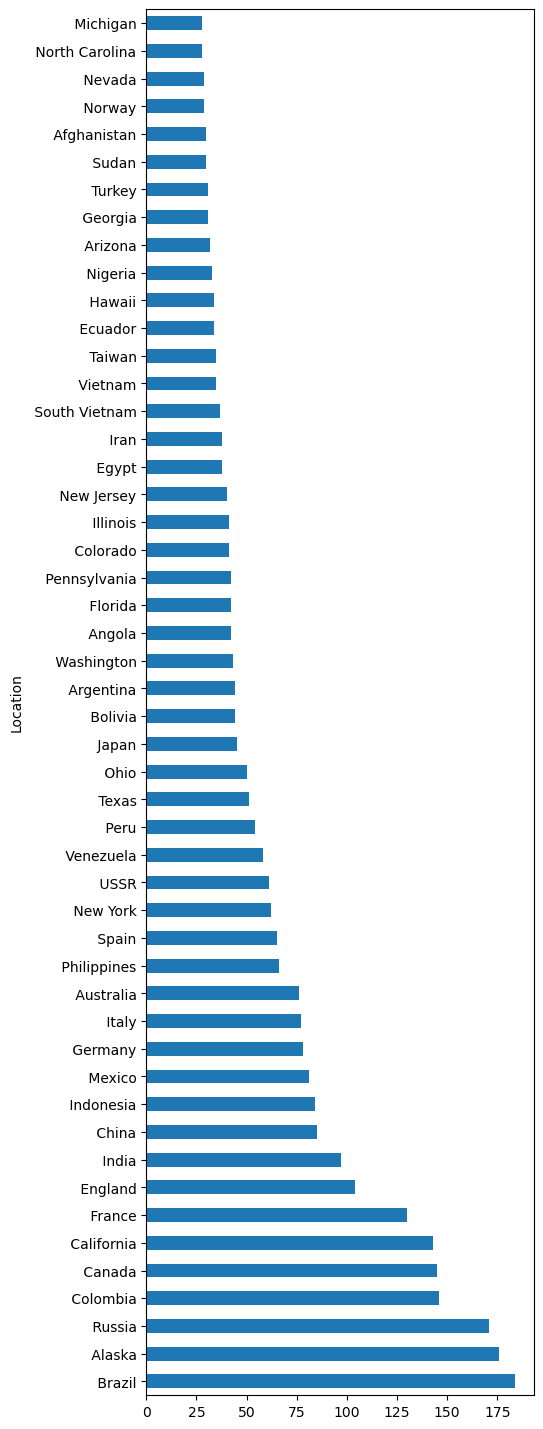

In [21]:
plt.figure(figsize=(5,18))
df['Location'].value_counts().head(50).plot(kind='barh')

Inferences:
-Most aircraft crashes were for the aircraft types 'Training', 'Sightseeing'  and 'Test flight'.
-Most aircraft crashes were in the locations of Brazil, Alaska, Russia, Colombia and Canada.
-Most aircraft crashes occurred in the years 1972, 1968 and 1989.
-Douglas DC-3 was the aircraft type which crashed the most. It was a propeller-driven airliner that played a key role in World War II, which explains the large number of crashes